In [1]:
import pandas as pd
songs = pd.read_csv("songs.csv")

In [2]:
songs.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.244,0.982,8,-5.079,0.109,0.000005,0.905,0.0638,0.1960,189.746,death-metal
1,0.368,0.995,6,-4.894,0.183,0.000013,0.849,0.1590,0.1430,98.040,death-metal
2,0.227,0.981,6,-5.343,0.145,0.000006,0.840,0.0581,0.1240,115.207,death-metal
3,0.265,0.993,8,-4.949,0.173,0.000008,0.901,0.1300,0.0857,100.688,death-metal
4,0.348,0.998,2,-5.299,0.208,0.000006,0.897,0.1610,0.0391,109.997,death-metal


In [4]:
features = songs.iloc[:,0:10]
features

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.244,0.982,8,-5.079,0.1090,0.000005,0.9050,0.0638,0.1960,189.746
1,0.368,0.995,6,-4.894,0.1830,0.000013,0.8490,0.1590,0.1430,98.040
2,0.227,0.981,6,-5.343,0.1450,0.000006,0.8400,0.0581,0.1240,115.207
3,0.265,0.993,8,-4.949,0.1730,0.000008,0.9010,0.1300,0.0857,100.688
4,0.348,0.998,2,-5.299,0.2080,0.000006,0.8970,0.1610,0.0391,109.997
...,...,...,...,...,...,...,...,...,...,...
395,0.294,0.139,4,-18.174,0.0365,0.982000,0.8660,0.1200,0.1110,140.295
396,0.301,0.263,2,-13.932,0.0364,0.946000,0.0832,0.2060,0.1890,46.535
397,0.225,0.133,4,-17.643,0.0398,0.958000,0.8830,0.0986,0.1470,72.287
398,0.335,0.224,2,-14.953,0.0309,0.981000,0.8980,0.1110,0.4610,79.361


In [9]:
from sklearn.preprocessing import StandardScaler
features = StandardScaler().fit_transform(features) # initialize function, then fit and transform features into scaled features
from sklearn.preprocessing import Normalizer
features = Normalizer().fit_transform(features)
features


array([[-0.36638013,  0.29147689,  0.26151647, ..., -0.2234725 ,
        -0.19481884,  0.62043807],
       [-0.24788486,  0.44355423,  0.1369077 , ..., -0.14187477,
        -0.380094  , -0.26979364],
       [-0.51613005,  0.38125655,  0.12263285, ..., -0.30312987,
        -0.37088834, -0.0440504 ],
       ...,
       [-0.36631116, -0.41602444, -0.06887636, ..., -0.16366482,
        -0.23518875, -0.37884993],
       [-0.23284449, -0.38952096, -0.25479904, ..., -0.16877338,
         0.135095  , -0.36557966],
       [-0.20477814, -0.40104102,  0.0097829 , ..., -0.1718252 ,
        -0.22436911, -0.3817317 ]])

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)


In [11]:
songs['PC1'] = principalComponents[:,0]
songs['PC2'] = principalComponents[:,1]
X = songs[['PC1','PC2']]

In [12]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

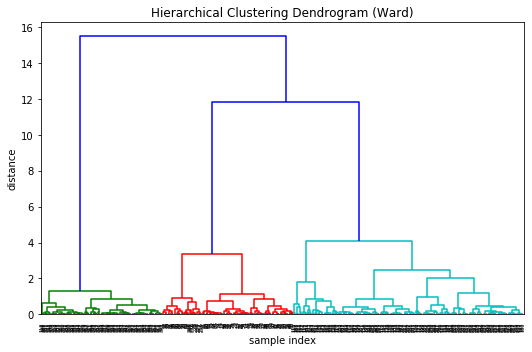

In [13]:

linkage_matrix = linkage(X, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

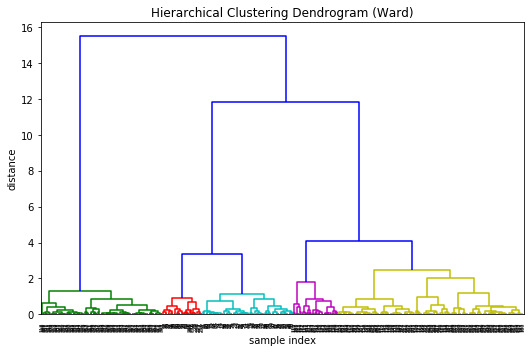

In [14]:

linkage_matrix = linkage(X, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold = 3,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [17]:
songs['labels'] = clustering.labels_

In [18]:
songs.groupby(['labels']).size()

labels
0    191
1    101
2    108
dtype: int64

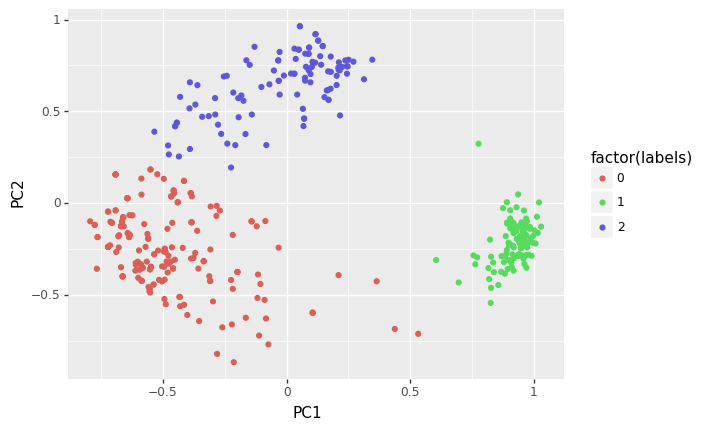

<ggplot: (-9223371893440365575)>

In [19]:
from plotnine import *
ggplot(songs,aes(x="PC1",y="PC2",colour="factor(labels)"))+geom_point()

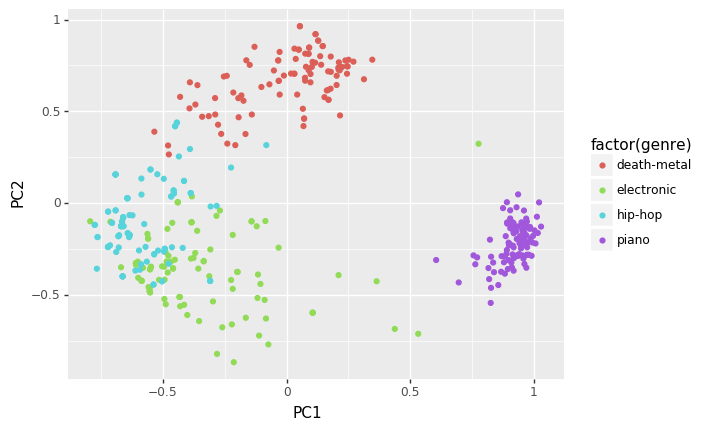

<ggplot: (143415464477)>

In [20]:
from plotnine import *
ggplot(songs,aes(x="PC1",y="PC2",colour="factor(genre)"))+geom_point()